In [1]:
%matplotlib inline
import requests
import pandas as pd

import os
import sys
path = os.path.abspath('../')
sys.path.append(path)

In [2]:
from cgsn_parsers.parsers.parse_pco2w import Parser

In [3]:
# Coastal Endurance Washington Shelf Surface Mooring MFN (80 meters) PCO2W
baseurl = "https://rawdata.oceanobservatories.org/files/CE07SHSM/D00004/cg_data/dcl35/pco2w/"
fname = "20161003.pco2w.log"

In [4]:
# initialize the Parser object for pco2w
pco2w = Parser(baseurl + fname)

In [5]:
r = requests.get(pco2w.infile, verify=True) # use verify=False for expired certificate
pco2w.raw = r.content.decode('utf-8')

In [6]:
len(pco2w.raw), pco2w.raw[:100]

(8690,
 '2016/10/03 00:27:34.707 [pco2w:DLOGP5]:Logger started: Idle state, without initialize\n2016/10/03 00:')

In [7]:
pco2w.parse_data()

In [8]:
pco2w.data.keys()

dict_keys(['time', 'voltage_battery', 'unique_id', 'light_measurements', 'record_type', 'record_time', 'collect_date_time', 'thermistor_raw', 'process_date_time', 'record_length'])

In [9]:
df = pd.DataFrame(pco2w.data)
df['dt_utc'] = pd.to_datetime(df.time, unit='s')
df.set_index('dt_utc', drop=True, inplace=True)

In [10]:
df.head()

collect_date_time  \
dt_utc                                             
2016-10-03 00:30:21.942  2016/10/03 00:30:21.942   
2016-10-03 01:30:24.161  2016/10/03 01:30:24.161   
2016-10-03 02:30:23.392  2016/10/03 02:30:23.392   
2016-10-03 03:30:22.773  2016/10/03 03:30:22.773   
2016-10-03 04:30:22.931  2016/10/03 04:30:22.931   

                                                        light_measurements  \
dt_utc                                                                       
2016-10-03 00:30:21.942  [89, 28, 3770, 421, 2427, 1224, 1738, 8372, 90...   
2016-10-03 01:30:24.161  [89, 27, 3773, 421, 2427, 1223, 1739, 8366, 91...   
2016-10-03 02:30:23.392  [89, 29, 3774, 420, 2427, 1221, 1739, 8356, 90...   
2016-10-03 03:30:22.773  [86, 29, 3773, 420, 2425, 1222, 1740, 8356, 89...   
2016-10-03 04:30:22.931  [88, 29, 3773, 421, 2426, 1221, 1739, 8353, 88...   

                               process_date_time  record_length  record_time  \
dt_utc                                                                         
2016-10-03 00:30:21.942  2016/10/03 00:35:30.196             39   3558299730   
2016-10-03 01:30:24.161  2016/10/03 01:35:32.095             39   3558303332   
2016-10-03 02:30:23.392  2016/10/03 02:35:32.056             39   3558306932   
2016-10-03 03:30:22.773  2016/10/03 03:35:30.658             39   3558310531   
2016-10-03 04:30:22.931  2016/10/03 04:35:30.896             39   3558314131   

                         record_type  thermistor_raw          time  unique_id  \
dt_utc                                                                          
2016-10-03 00:30:21.942            4            2204  1.475455e+09        253   
2016-10-03 01:30:24.161            4            2203  1.475458e+09        253   
2016-10-03 02:30:23.392            4            2202  1.475462e+09        253   
2016-10-03 03:30:22.773            4            2203  1.475465e+09        253   
2016-10-03 04:30:22.931            4            2203  1.475469e+09        253   

                         voltage_battery  
dt_utc                                    
2016-10-03 00:30:21.942             3146  
2016-10-03 01:30:24.161             3146  
2016-10-03 02:30:23.392             3146  
2016-10-03 03:30:22.773             3146  
2016-10-03 04:30:22.931             3146

In [11]:
# Later, can drop time, and maybe dt_utc (not the index)
df.shape, df.columns

((21, 10),
 Index(['collect_date_time', 'light_measurements', 'process_date_time',
        'record_length', 'record_time', 'record_type', 'thermistor_raw', 'time',
        'unique_id', 'voltage_battery'],
       dtype='object'))

In [12]:
df.dtypes

collect_date_time      object
light_measurements     object
process_date_time      object
record_length           int64
record_time             int64
record_type             int64
thermistor_raw          int64
time                  float64
unique_id               int64
voltage_battery         int64
dtype: object

In [13]:
#extract a specific element from each list of light_measurements
df['light_0'] = [x[0] for x in df['light_measurements']]
df['light_end'] = [x[-1] for x in df['light_measurements']]

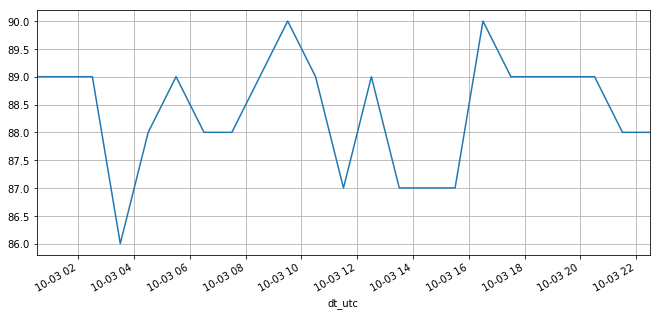

In [14]:
df['light_0'].plot(figsize=(11,5), grid='on');